In [26]:
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
import numpy as np

In [6]:
trolley = pd.read_csv('./data/Trolley.csv', sep=';')

In [7]:
trolley.head()

,case,response,order,id,age,male,edu,action,intention,contact,story,action2
0,cfaqu,4,2,96;434,14,0,Middle School,0,0,1,aqu,1
1,cfbur,3,31,96;434,14,0,Middle School,0,0,1,bur,1
2,cfrub,4,16,96;434,14,0,Middle School,0,0,1,rub,1
3,cibox,3,32,96;434,14,0,Middle School,0,1,1,box,1
4,cibur,3,4,96;434,14,0,Middle School,0,1,1,bur,1


(array([1274.,  909.,    0., 1071.,    0., 2323., 1462.,    0., 1445.,
        1446.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

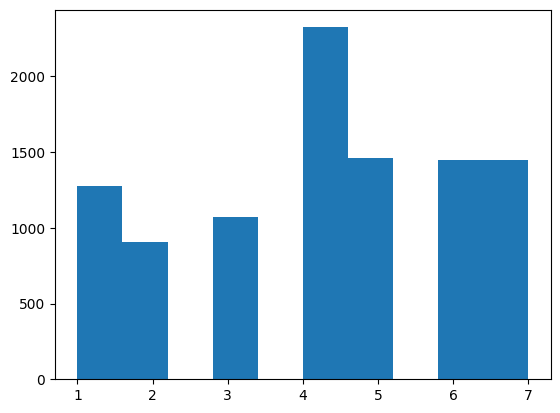

In [9]:
plt.hist(trolley.response)

In [34]:
cumulative_proportion = np.cumsum((trolley.response.value_counts()/len(trolley)).sort_index())

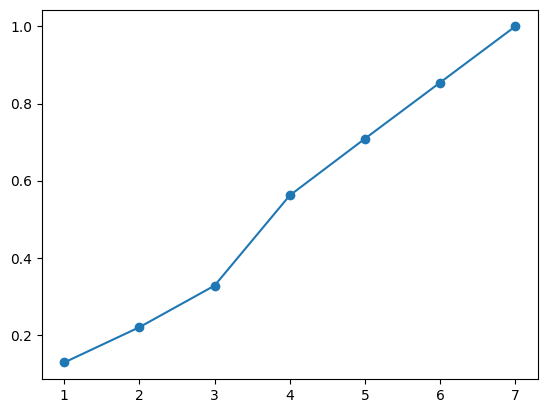

In [46]:
plt.plot(cumulative_proportion.index, cumulative_proportion, '-o')

In [39]:
cumulative_odds = cumulative_proportion / (1- cumulative_proportion)

In [40]:
cumulative_odds

1    1.471811e-01
2    2.817865e-01
3    4.874176e-01
4    1.281185e+00
5    2.434798e+00
6    5.867220e+00
7   -4.503600e+15
Name: response, dtype: float64

In [42]:
log_cumulative_odds = np.log(cumulative_odds)

/Users/ciguaran/personal/statistical_rethinking/venv/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


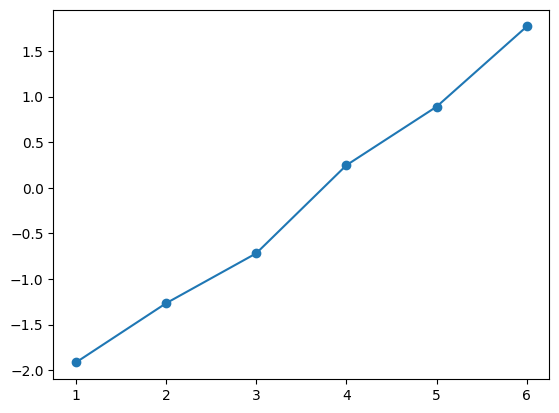

In [45]:
plt.plot(log_cumulative_odds.index, log_cumulative_odds, '-o')

In [52]:
with pm.Model() as m1:
    k = pm.Normal('k', 0.0, 1.5, shape=6, initval=np.arange(6) - 2.5)
    r = pm.OrderedLogistic('response', 0.0, k, observed = trolley.response -1 )

In [53]:
with m1:
    trace_m1 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [k]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 36 seconds.


In [54]:
az.summary(trace_m1)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
k[0],-1.915,0.030,-1.976,-1.861,0.001,0.001,1664.0,2340.0,1.0
k[1],-1.265,0.025,-1.307,-1.216,0.001,0.000,1458.0,1978.0,1.0
k[2],-0.717,0.022,-0.756,-0.677,0.001,0.000,1571.0,2310.0,1.0
k[3],0.249,0.020,0.211,0.287,0.000,0.000,1677.0,2261.0,1.0
k[4],0.891,0.022,0.851,0.934,0.001,0.000,1773.0,2286.0,1.0
k[5],1.771,0.029,1.718,1.825,0.001,0.000,2157.0,2705.0,1.0
response_probs[0],0.129,0.003,0.122,0.134,0.000,0.000,1664.0,2340.0,1.0
response_probs[1],0.092,0.003,0.086,0.097,0.000,0.000,3675.0,3410.0,1.0
response_probs[2],0.108,0.003,0.102,0.114,0.000,0.000,4468.0,3555.0,1.0
response_probs[3],0.234,0.004,0.226,0.242,0.000,0.000,3606.0,3067.0,1.0
